In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from tensorflow.keras.callbacks  import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Activation, Dense
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('./kaggle/titanic/train.csv', delimiter = ',')
data = data.drop(columns=['Cabin'])
print(data.isnull().sum())
data = data.dropna()

dataset = data.copy()
x = dataset[['Pclass', 'Sex', 'Age', 'Parch']]
y = dataset[['Survived']]

le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])  # 'female' -> 0, 'male' -> 1

"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 및 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
"""

model = Sequential()
model.add(Dense(256, input_dim = 4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = opt = tf.keras.optimizers.Adam(learning_rate=0.005)

model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])

MODEL_DIR ='./model/titanic'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 40)
modelpath="./model/titanic/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(x, y, validation_split = 0.2, epochs = 3500, batch_size= 50, callbacks=[early_stopping_callback, checkpointer])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
Epoch 1/3500


/var/folders/x5/47g9ybwn3dj2qvmd4l8th0x80000gn/T/ipykernel_96315/1608702068.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = le.fit_transform(x['Sex'])  # 'female' -> 0, 'male' -> 1
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7000 - loss: 0.5919
Epoch 1: val_loss improved from inf to 0.86967, saving model to ./model/titanic/01-0.8697.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5840 - loss: 0.8120 - val_accuracy: 0.3706 - val_loss: 0.8697
Epoch 2/3500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3600 - loss: 0.8888
Epoch 2: val_loss improved from 0.86967 to 0.67177, saving model to ./model/titanic/02-0.6718.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5101 - loss: 0.7427 - val_accuracy: 0.6294 - val_loss: 0.6718
Epoch 3/3500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6400 - loss: 0.6681
Epoch 3: val_loss improved from 0.67177 to 0.66386, saving model to ./model/titanic/03-0.6639.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6064 - loss: 0.6787 - val_accuracy: 0.6364 - val_loss: 0.6639
Epoch 4/3500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6000 - loss: 0.6622
Epoch 4: val_loss impr

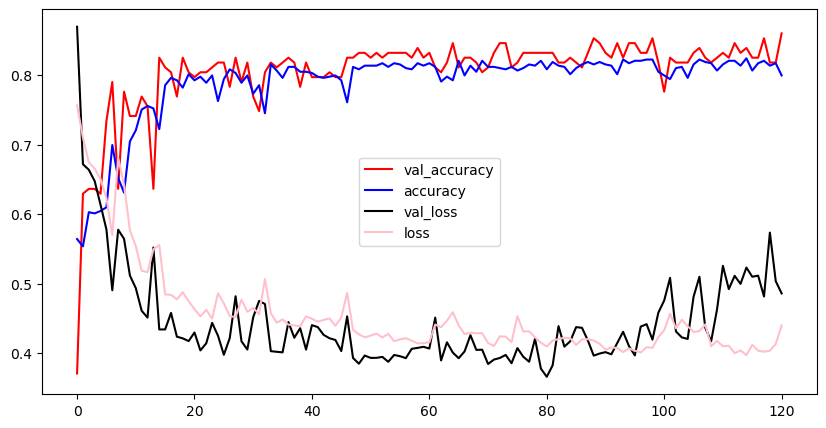

In [25]:

y_vacc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_loss = history.history['loss']

x_len = np.arange(len(y_acc))
plt.figure(figsize=(10, 5))
plt.plot(x_len, y_vacc, c='red', markersize = 1, label = 'val_accuracy')
plt.plot(x_len, y_acc, c='blue', markersize = 1, label = 'accuracy')
plt.plot(x_len, y_vloss, c='black', markersize = 1, label = 'val_loss')
plt.plot(x_len, y_loss, c='pink', markersize = 1, label = 'loss')
plt.legend()
plt.show()

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

test_data = pd.read_csv("./kaggle/titanic/test.csv")
    
e = LabelEncoder()
test_data['Sex'] = e.fit_transform(test_data['Sex'])

print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [29]:
#결측치 를 (평균 또는 중앙값으로 대체
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

test_data = test_data[['PassengerId','Pclass', 'Sex', 'Age', 'Parch']]

passenger_ids = test_data['PassengerId']

x_test = test_data[['Pclass', 'Sex', 'Age', 'Parch']]

scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

#predictions = model.predict(x_test_scaled)
predictions = model.predict(x_test)
predicted_classes = (predictions >0.5).astype(int).flatten()

output = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predicted_classes
})

output.to_csv('submission.csv', index=False)
print("submission file made")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
submission file made


     accuracy      loss  val_accuracy  val_loss
149  0.824253  0.424614      0.832168  0.432397
150  0.817223  0.417540      0.818182  0.415358
151  0.817223  0.418839      0.832168  0.425691
152  0.810193  0.427227      0.811189  0.421620
153  0.803163  0.428457      0.804196  0.413375


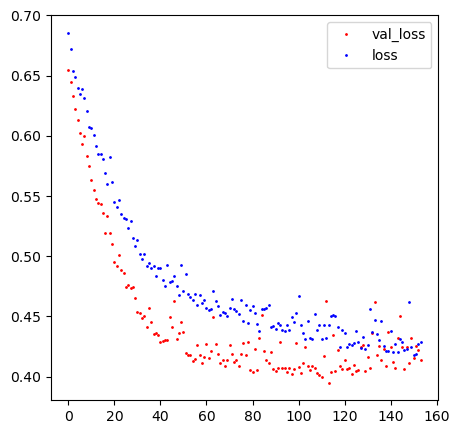

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/var/folders/x5/47g9ybwn3dj2qvmd4l8th0x80000gn/T/ipykernel_96315/631483350.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Sex'] = le.fit_transform(x_test['Sex'])  # 'female' -> 0, 'male' -> 1


[[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0
  1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
  0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1
  0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
  0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0
  0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
  1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1
  0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1
  0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0]]
0.8146067261695862


In [21]:
hist = pd.DataFrame(history.history)
print(hist.tail())

y_vloss = history.history['val_loss']

y_loss = history.history['loss']

import matplotlib.pyplot as plt

x_len = np.arange(len(y_loss))
plt.figure(figsize=(5, 5))
plt.plot(x_len, y_vloss, "o", c='red', markersize = 1, label='val_loss')
plt.plot(x_len, y_loss, "o", c='blue', markersize = 1, label='loss')
plt.legend()
plt.show()

testdata = pd.read_csv('./kaggle/titanic/test.csv', delimiter = ',')
x_test = testdata[['Pclass', 'Sex', 'Age', 'Parch']]
le = LabelEncoder()
x_test['Sex'] = le.fit_transform(x_test['Sex'])  # 'female' -> 0, 'male' -> 1
y_predict = model.predict(x_test).reshape(1, -1)
y_classes = (y_predict > 0.5).astype(int)
print(y_classes)

loss, accuracy = model.evaluate(x, y, verbose=0)
print(accuracy)